# Python Workshop 4: The Pandas Workshop

If you miss the previous workshop, go back to the repository.

## Introduction to Pandas

Pandas is a powerful toolset for **analyzing structured data**, developed by Wes McKinney in 2008. Built on top of NumPy (for data storage and computation), Pandas provides specific types, methods, and functions for data analysis, offering excellent support for data analysis and data mining. Pandas can also integrate seamlessly with the data visualization tool matplotlib, making it easy and enjoyable to create visual representations of data.

The core data types in Pandas are `Series` (data series) and `DataFrame` (data window/data frame), used for handling one-dimensional and two-dimensional data, respectively. In addition, there is a type called `Index` and its subtypes, which provide indexing functionality for `Series` and `DataFrame`. In everyday work, `DataFrame` is the most widely used, as this two-dimensional data structure corresponds perfectly to tables with rows and columns. Both `Series` and `DataFrame` offer a wide array of methods for data processing, enabling data analysts to perform various operations such as data filtering, merging, concatenation, cleaning, preprocessing, aggregation, pivoting, and visualization.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

## Read and write tabular data



### Creating a DataFrame Object from a CSV File

The `read_csv` function from the Pandas module allows us to read CSV files and create a DataFrame object. The `read_csv` function has many parameters; here are some of the more important ones:

- **filepath_or_buffer**: Location of the csv file. It accepts any string path or URL of the file.
- **sep**: It stands for separator, default is ‘, ‘.
- **header**: It accepts int, a list of int, row numbers to use as the column names, and the start of the data. If no names are passed, i.e., header=None, then, it will display the first column as 0, the second as 1, and so on.
- **usecols**: Retrieves only selected columns from the CSV file.
- **nrows**: Number of rows to be displayed from the dataset.
- **index_col**: If None, there are no index numbers displayed along with records.  
- **skiprows**: Skips passed rows in the new data frame.

Let's start with the csv file called "mock_timeseries.csv" first.

The `head()` function whould print out the first five rows of the table.

In [2]:
mock_timeseries = pd.read_csv("data/mock_timeseries.csv")
mock_timeseries.head()

,datetime,measurement
0,2021/12/01 08:15,5
1,2021/12/01 10:12,6
2,2021/12/01 12:55,4
3,2021/12/02 08:11,6
4,2021/12/02 12:11,6


Now, let's try a different csv file called "AGAGE_CFC-11_global_monthly.csv" and see what's coming out.

In [3]:
AGAGE_CFC_11_global_monthly = pd.read_csv("data/AGAGE_CFC-11_global_monthly.csv")
AGAGE_CFC_11_global_monthly.head()

,%CFC-11 Global mole fraction (ppt) output from AGAGE 12-box model,Unnamed: 1
0,"%Cite as Rigby, et al. 2019 10.1038/s41586-019...",NaN
1,%Wed Jul 22 17:51:58 2020,NaN
2,Time,Global mole fraction (ppt)
3,01/01/1979 00:00,152.92688
4,01/02/1979 00:00,152.69229


This is not what we are expecting. The unexpected output is due to the file containing metadata in the first few rows, which isn’t part of the actual data.

To resolve this, we need to skip these initial metadata rows. We can do this by specifying the `skiprows` parameter to ignore them and start reading from the actual data rows.

In [4]:
AGAGE_CFC_11_global_monthly = pd.read_csv("data/AGAGE_CFC-11_global_monthly.csv", skiprows=3)
AGAGE_CFC_11_global_monthly.head()

,Time,Global mole fraction (ppt)
0,01/01/1979 00:00,152.92688
1,01/02/1979 00:00,152.69229
2,01/03/1979 00:00,152.49632
3,01/04/1979 00:00,153.32755
4,01/05/1979 00:00,154.55249


Let's move to another csv file called "air-quality-data-continuous.csv"(the documentation of this data is as follow: [Continuous Air Quality](https://www.arcgis.com/home/item.html?id=dc454f5fb8bf41eeb4112514d4f00242)) and see what's going on.

In [5]:
air_quality_data_continuous = pd.read_csv("data/air-quality-data-continuous.csv")
air_quality_data_continuous.head()

,date_time;nox;no2;no;siteid;pm10;nvpm10;vpm10;nvpm25;pm25;vpm25;co;o3;so2;temp;rh;press;location;geo_point_2d;datestart;dateend;current;instrumenttype
2020-11-05T23:00:00+00:00;316.136;73.249;158.407;500;162.322;;;;;;;;;;;;Temple Way;51.4579497129,-2.58398909033;2017-08-01T00:00:00+00:00;;True...
2021-01-01T02:00:00+00:00;440.64;79.56;235.49;500;159.423;;;;;;;;;;;;Temple Way;51.4579497129,-2.58398909033;2017-08-01T00:00:00+00:00;;True...
2021-01-04T09:00:00+00:00;123.547;47.047;49.892;500;;;;;;;;;;;;;Temple Way;51.4579497129,-2.58398909033;2017-08-01T00:00:00+00:00;;True...
2021-01-04T08:00:00+00:00;109.395;39.78;45.402;500;;;;;;;;;;;;;Temple Way;51.4579497129,-2.58398909033;2017-08-01T00:00:00+00:00;;True...
2021-01-03T11:00:00+00:00;48.96;21.994;17.587;500;;;;;;;;;;;;;Temple Way;51.4579497129,-2.58398909033;2017-08-01T00:00:00+00:00;;True...


The output here isn’t what we expected because the data in the CSV file uses semicolons (;) as the delimiter, rather than commas. The `read_csv` function assumes commas by default, so we need to specify the correct separator.

To load this file correctly, set `sep=";"` in the read_csv function. Since the "date_time" is the actual meaningful index, we would set `index_col="date_time"` and change the `String` object into `Datetime` object:

In [6]:
air_quality_data_continuous = pd.read_csv("data/air-quality-data-continuous.csv", sep = ";", index_col="date_time")
air_quality_data_continuous.index = pd.to_datetime(air_quality_data_continuous.index)
air_quality_data_continuous.head()

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-11-05 23:00:00+00:00,316.136,73.249,158.407,500,162.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-01 02:00:00+00:00,440.640,79.560,235.490,500,159.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-04 09:00:00+00:00,123.547,47.047,49.892,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-04 08:00:00+00:00,109.395,39.780,45.402,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-03 11:00:00+00:00,48.960,21.994,17.587,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


Another csv file called "Planetary_fact_sheet.csv" loads the information of planets in the solar system. Let's have a look.

In [7]:
Planetary_fact_sheet = pd.read_csv("data/Planetary_fact_sheet.csv", skiprows=3, sep = ";")
Planetary_fact_sheet

,Mass (10^24kg),0.33,4.87,5.97,0.642,1898,568,86.8,102
0,Diameter (km),4879.0,"12,104","12,756",6792.00,"142,984","120,536","51,118","49,528"
1,Density (kg/m3),5427.0,5243,5514,3933.00,1326,687,1271,1638
2,Gravity (m/s2),3.7,8.9,9.8,3.70,23.1,9,8.7,11
3,Rotation Period (hours),1407.6,-5832.5,23.9,24.60,9.9,10.7,-17.2,16.1
4,Length of Day (hours),4222.6,2802,24,24.70,9.9,10.7,17.2,16.1
5,Distance from Sun (10^6 km),57.9,108.2,149.6,227.90,778.6,1433.5,2872.5,4495.1
6,Perihelion (10^6 km),46.0,107.5,147.1,206.60,740.5,1352.6,2741.3,4444.5
7,Aphelion (10^6 km),69.8,108.9,152.1,249.20,816.6,1514.5,3003.6,4545.7
8,Orbital Period (days),88.0,224.7,365.2,687.00,4331,"10,747","30,589","59,800"
9,Mean Temperature (C),167.0,464,15,-65.00,-110,-140,-195,-200


To enhance the readability of our DataFrame, let’s assign column names to represent each planet and replace any "Unknown" values with `NaN` (which stands for "Not a Number," indicating missing or undefined data).

In [8]:
Planetary_fact_sheet = pd.read_csv("data/Planetary_fact_sheet.csv", 
                                   skiprows=3, 
                                   sep = ";", 
                                   # Assign column names for each planet to make data more readable
                                   names=["", "MERCURY", "VENUS", "EARTH", "MARS", "JUPITER", "SATURN", "URANUS", "NEPTUNE"],
                                   # Replace any "Unknown*" values with NaN to indicate missing data
                                   na_values=["Unknown*"])
Planetary_fact_sheet

,,MERCURY,VENUS,EARTH,MARS,JUPITER,SATURN,URANUS,NEPTUNE
0,Mass (10^24kg),0.33,4.87,5.97,0.642,1898,568,86.8,102
1,Diameter (km),4879.00,"12,104","12,756",6792.000,"142,984","120,536","51,118","49,528"
2,Density (kg/m3),5427.00,5243,5514,3933.000,1326,687,1271,1638
3,Gravity (m/s2),3.70,8.9,9.8,3.700,23.1,9,8.7,11
4,Rotation Period (hours),1407.60,-5832.5,23.9,24.600,9.9,10.7,-17.2,16.1
5,Length of Day (hours),4222.60,2802,24,24.700,9.9,10.7,17.2,16.1
6,Distance from Sun (10^6 km),57.90,108.2,149.6,227.900,778.6,1433.5,2872.5,4495.1
7,Perihelion (10^6 km),46.00,107.5,147.1,206.600,740.5,1352.6,2741.3,4444.5
8,Aphelion (10^6 km),69.80,108.9,152.1,249.200,816.6,1514.5,3003.6,4545.7
9,Orbital Period (days),88.00,224.7,365.2,687.000,4331,"10,747","30,589","59,800"


### Creating a DataFrame Object from a SQL Database
The `read_sql` function from the Pandas module allows us to read data directly from an SQL database and create a DataFrame object. This function can work with various SQL databases (e.g., MySQL, SQLite) by passing in a connection object. Here are some of the more important parameters for `read_sql`:

- **sql**: This is the SQL query or table name to read. It can be a full SQL query string (e.g., `"SELECT * FROM table_name"`) or a simple table name.
- **con**: The database connection object, typically created using `SQLAlchemy` or `sqlite3`.
- **index_col**: Specifies which column(s) to set as the DataFrame’s index.
- **coerce_float**: Converts all non-string, non-numeric objects to floating-point numbers if `True`.
- **parse_dates**: Parses specified columns as dates. Accepts a list of column names or dictionary specifying column names and parsing formats.
- **chunksize**: Allows data to be read in chunks if the dataset is large, which is useful for processing data in manageable portions.
- **params**: A dictionary of parameters to bind to the query, useful for parameterized queries.

#### Defining our database

We will start by defining the `con` input and what that means.

First, we need to define *what* we want to use to interpret our database, known as a *database service*. A specific database service will have been used to create the database initially and so also needs to be used to read and interpret the database.

The *database service* we are using for this database is called *SQLite* but there are other similiar services such as *MySQL* or *PostgreSQL* which you may come across. All these options use a form of SQL to access data.

In [9]:
database_service = "sqlite"

Second, we need to define *where* our database is stored.

We have a local copy of our SQLite database in the "data" folder called `ukpvgeo.db`, but if we were accessing a database from an online server we could use a URL address here (complete with login information if needed).

In [10]:
database = "data/ukpvgeo.db"

The underlying Python library which understands how to access SQL databases is called `SQLAlchemy` but we don't need to access that directly because pandas can handle that for us. However, we do need to construct a string (which `SQLAlchemy` calls a connectable) that this library understands to be able to load and access our database. We can do so using the inputs we defined above:

In [11]:
connectable = f"{database_service}:///{database}"
print(f"Our connectable for our database is {connectable}")

Our connectable for our database is sqlite:///data/ukpvgeo.db


#### Defining our query
One of the benefits of using SQL-type databases is that we can use SQL queries to only grab the data we need. Often these types of databases contain lots of data (100s MB - TB) which would be impractical to load fully into memory, like we did when reading and querying csv files using pandas.

SQL is a language for selecting and filtering data which can be used to construct a database query.

For our "ukpvgeo.db" data we need additional information about the tables contained within this SQLite database and the columns within those tables. These details can be found within the accompanying data dictionary file: ["README_ukpvgeo.txt"](data/README_ukpvgeo.txt) (stored in the "data" directory).

From this file, we can see that the "ukpvgeo.db" database contains one table:
- "pv"

This table contains lots of columns, but some we may want to pick out are:
- "latitude"
- "longitude"
- "capacity_repd_MWp"

The final column listed above is defined as "Renewable Energy Planning Database Megawatt estimated peak capacity of PV panel" and so contains information on the peak energy capacity for each solar panel site.

When we construct an SQL query we use a set of keywords. Here are a few keywords we often need:
- SELECT - which columns to select from the table
- FROM - which table we want the data from (in this case "pv")
- WHERE - any other conditions we want to apply e.g. values above a certain latitude

We can put these all together into a single string, in the right order, to create our SQL query. Here is an example of one query we could create (as a string):

In [12]:
query = "SELECT latitude, longitude, capacity_repd_MWp FROM pv WHERE latitude > 50"

This would *select* the columns "latitude", "longitude" and "capacity_repd_MWp" *from* the "pv" table *where* the latitude values are greater than 50.

#### Accessing the data

We can now use this query string along with the database (connectable) string we defined previously to access the data from the database and view this as a pandas DataFrame:

In [13]:
ukpvgeo_selected = pd.read_sql(query, connectable)
ukpvgeo_selected.head()

,latitude,longitude,capacity_repd_MWp
0,50.335310,-4.828931,NaN
1,50.337199,-4.831966,NaN
2,50.337513,-4.829606,NaN
3,50.446881,-4.290731,NaN
4,50.384755,-4.007153,NaN


### Outputting DataFrames to Various File Formats

We can output any of our nicely formatted or updated DataFrames to various file formats using the appropriate Pandas functions. Here, we will focus on a few common file types and their respective functions. 

#### CSV File
To output a DataFrame as a CSV file, we use the `.to_csv` function. Similar to `read_csv`, there are many optional arguments for this function:
1. The only required argument is the output filename. E.g., `df.to_csv("filename.csv")`
2. We can specify whether or not to include the index: `df.to_csv("filename.csv", index=False)`. This is often preferred if the default index is still included.

In [14]:
ukpvgeo_selected.to_csv('ukpvgeo_selected.csv')

#### Excel File
To output a DataFrame as an Excel file, we use the `.to_excel` function:
1. The required argument is the output filename, including the `.xlsx` extension. E.g., `df.to_excel("filename.xlsx")`
2. We can specify the sheet name: `df.to_excel("filename.xlsx", sheet_name="Sheet1")`.

In [15]:
ukpvgeo_selected.to_csv('ukpvgeo_selected.xlsx')

#### SQL Database
To output a DataFrame to an SQL database, we use the `.to_sql` function:
1. The required argument is the name of the table in the database. E.g., `df.to_sql("table_name", con=connection, if_exists="replace")`.
2. The `con` parameter is the database connection object created using a library like `SQLAlchemy` or `sqlite3`.
3. We can specify what to do if the table already exists using the `if_exists` parameter, which can be set to `"replace"`, `"append"`, or `"fail"`.

In [16]:
table_new = "pv"
connectable_new = "sqlite:///ukpvgeo_subset.db"

ukpvgeo_selected.to_sql(table_new, connectable_new, if_exists="replace")

265240

## Exercise 1

You can use `read_csv()` to open excel(xlsx) files and text(txt) files also.

Let's start by looking at an Excel file which contain football results. This is within the "data" folder and the file is called "premier-football-results.xlsx".

This file contains simple 5-column tables with a different season in each Excel worksheet.

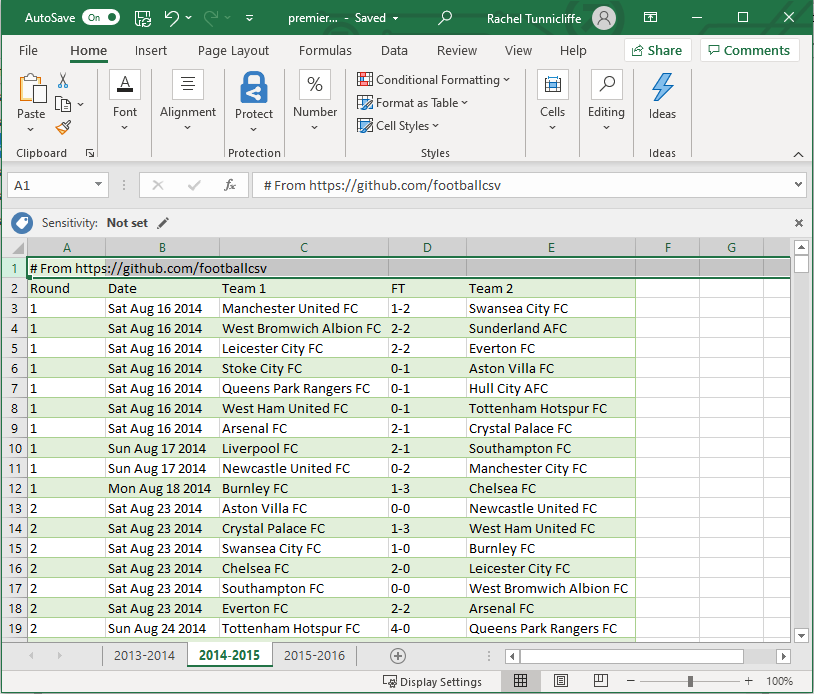

Please use the `read_csv()` function to correctly read and format this file so that it displays the data in a structured DataFrame format.

In [17]:
### Add your code here

## Exercise 2

Please use the `read_csv()` function to load data from a file called "ONS_unemployment_annual_modified.txt". Your goal is to correctly read and format this file so that it displays the data in a structured DataFrame format.

In [18]:
### Add your code here

## Getting an Overview of a DataFrame

Once you’ve loaded your data into a DataFrame, it's essential to understand its structure and content. Here are several helpful methods to quickly get an overview of a DataFrame in Pandas:

1. **Basic Information with `info()`**  
   - Use `df.info()` to display a summary of the DataFrame, including:
     - The total number of entries (rows),
     - The number of columns, their names, and data types,
     - The count of non-null values in each column.
   - This is a quick way to identify columns with missing values and get a sense of the data types.

In [19]:
# We will use the air quality data to showcase various data analysis techniques throughout this tutorial.
air_quality_data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2217 entries, 2020-11-05 23:00:00+00:00 to 2021-01-21 21:00:00+00:00
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nox             2177 non-null   float64
 1   no2             2209 non-null   float64
 2   no              2209 non-null   float64
 3   siteid          2217 non-null   int64  
 4   pm10            1987 non-null   float64
 5   nvpm10          0 non-null      float64
 6   vpm10           0 non-null      float64
 7   nvpm25          0 non-null      float64
 8   pm25            0 non-null      float64
 9   vpm25           0 non-null      float64
 10  co              0 non-null      float64
 11  o3              0 non-null      float64
 12  so2             0 non-null      float64
 13  temp            1632 non-null   float64
 14  rh              0 non-null      float64
 15  press           0 non-null      float64
 16  location        2217 non-null 

2. **Basic Statistics with `describe()`**  
   - Use `df.describe()` to get a summary of key statistics for numeric columns, such as:
     - Mean, standard deviation, min, and max values,
     - 25th, 50th, and 75th percentiles.
   - This is useful for spotting any unusual values or understanding the general distribution of numeric data.

In [20]:
# Display a summary of statistics for all columns in the DataFrame, including both numeric and non-numeric data
air_quality_data_continuous.describe(include='all')

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
count,2177.000000,2209.000000,2209.000000,2217.0,1987.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1632.000000,0.0,0.0,2217,2217,2217,0.0,2217,2217
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2217,2217,2217,NaN,2217,2217
mean,81.586223,33.107499,31.766229,500.0,20.171056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.266360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,99.435301,22.799517,52.189172,0.0,16.650133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.734355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.482000,-0.493400,-0.636100,500.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.316000,14.475700,2.886200,500.0,10.628000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,42.891200,29.568500,8.172300,500.0,15.459000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,101.836800,48.386000,35.495700,500.0,24.155000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. **Checking for Missing Values with `.isnull().sum()`**  
   - To check for missing values in each column, use `df.isnull().sum()`. This will return a count of `NaN` values for each column, helping you identify where data might be missing.

In [21]:
air_quality_data_continuous.isnull().sum()

nox                 40
no2                  8
no                   8
siteid               0
pm10               230
nvpm10            2217
vpm10             2217
nvpm25            2217
pm25              2217
vpm25             2217
co                2217
o3                2217
so2               2217
temp               585
rh                2217
press             2217
location             0
geo_point_2d         0
datestart            0
dateend           2217
current              0
instrumenttype       0
dtype: int64

## Sort

`DataFrame.sort_index()` sorts by an axis:

In [22]:
air_quality_data_continuous = air_quality_data_continuous.sort_index(axis=0, ascending=True)
air_quality_data_continuous.head()

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.4,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,NaN,NaN,NaN,500,5.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 02:00:00+00:00,NaN,NaN,NaN,500,4.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 03:00:00+00:00,NaN,NaN,NaN,500,6.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


`DataFrame.sort_values()` sorts by values:

In [23]:
AGAGE_CFC_11_global_monthly = AGAGE_CFC_11_global_monthly.sort_values('Global mole fraction (ppt)',ascending=False)
AGAGE_CFC_11_global_monthly.head()

,Time,Global mole fraction (ppt)
179,01/12/1993 00:00,266.08209
180,01/01/1994 00:00,266.01685
178,01/11/1993 00:00,266.00323
177,01/10/1993 00:00,265.95547
181,01/02/1994 00:00,265.90283


## Selection

### Getitem ([])

For a `DataFrame`, passing a single label selects a columns and yields a `Series` equivalent to `df.A`

In [24]:
air_quality_data_continuous['nox']

date_time
2020-10-21 23:00:00+00:00      8.4705
2020-10-22 00:00:00+00:00      6.4872
2020-10-22 01:00:00+00:00         NaN
2020-10-22 02:00:00+00:00         NaN
2020-10-22 03:00:00+00:00         NaN
                               ...   
2021-01-22 03:00:00+00:00    114.9410
2021-01-22 04:00:00+00:00    154.5300
2021-01-22 05:00:00+00:00    141.3340
2021-01-22 06:00:00+00:00    241.1660
2021-01-22 07:00:00+00:00    502.4140
Name: nox, Length: 2217, dtype: float64

For a `DataFrame`, passing a slice `:` selects matching rows:

In [25]:
air_quality_data_continuous[0:3]

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.4,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,NaN,NaN,NaN,500,5.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


In [26]:
air_quality_data_continuous['2020-11-05 23:00:00+00:00':'2020-11-06 11:00:00+00:00']

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-11-05 23:00:00+00:00,316.1360,73.2490,158.4070,500,162.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 00:00:00+00:00,227.6602,58.9930,110.0019,500,108.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 01:00:00+00:00,100.4164,44.1277,36.7105,500,80.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 02:00:00+00:00,59.5505,38.9643,13.4259,500,55.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 03:00:00+00:00,66.5445,40.1902,17.1878,500,55.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 04:00:00+00:00,77.5930,43.5314,22.2144,500,41.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 05:00:00+00:00,118.4928,50.0712,44.6234,500,51.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 06:00:00+00:00,260.9071,70.9576,123.8818,500,53.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-11-06 07:00:00+00:00,453.6479,113.4791,221.8523,500,57.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


### Selection by label

Selecting a row matching a label:

In [27]:
air_quality_data_continuous.loc['2020-11-07 23:00:00+00:00']

nox                                    97.8655
no2                                    46.3504
no                                     33.5973
siteid                                     500
pm10                                    52.175
nvpm10                                     NaN
vpm10                                      NaN
nvpm25                                     NaN
pm25                                       NaN
vpm25                                      NaN
co                                         NaN
o3                                         NaN
so2                                        NaN
temp                                       7.9
rh                                         NaN
press                                      NaN
location                            Temple Way
geo_point_2d      51.4579497129,-2.58398909033
datestart            2017-08-01T00:00:00+00:00
dateend                                    NaN
current                                   True
instrumenttyp

Selecting all rows (`:`) with a select column labels:

In [28]:
air_quality_data_continuous.loc[:,['nox','no2']]

,nox,no2
date_time,,
2020-10-21 23:00:00+00:00,8.4705,7.5840
2020-10-22 00:00:00+00:00,6.4872,5.0949
2020-10-22 01:00:00+00:00,NaN,NaN
2020-10-22 02:00:00+00:00,NaN,NaN
2020-10-22 03:00:00+00:00,NaN,NaN
...,...,...
2021-01-22 03:00:00+00:00,114.9410,45.3260
2021-01-22 04:00:00+00:00,154.5300,42.4580
2021-01-22 05:00:00+00:00,141.3340,38.4410


For label slicing, both endpoints are included:

In [29]:
air_quality_data_continuous.loc['2020-11-07 23:00:00+00:00':'2020-11-08 13:00:00+00:00',['nox','no2']]

,nox,no2
date_time,,
2020-11-07 23:00:00+00:00,97.8655,46.3504
2020-11-08 00:00:00+00:00,100.4164,45.1885
2020-11-08 01:00:00+00:00,68.4535,38.0881
2020-11-08 02:00:00+00:00,48.9581,34.2892
2020-11-08 03:00:00+00:00,45.2584,31.5840
2020-11-08 04:00:00+00:00,60.4627,32.2189
2020-11-08 05:00:00+00:00,73.3864,32.6617
2020-11-08 06:00:00+00:00,59.7025,31.7073
2020-11-08 07:00:00+00:00,130.8083,41.4525


Selecting a single row and column label returns a scalar:

In [30]:
air_quality_data_continuous.loc['2020-11-07 23:00:00+00:00','no2']

46.3504

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
air_quality_data_continuous.at['2020-11-07 23:00:00+00:00','no2']

46.3504

### Selection by position

Select via the position of the passed integers:

In [32]:
air_quality_data_continuous.iloc[0]

nox                                     8.4705
no2                                      7.584
no                                      0.5781
siteid                                     500
pm10                                     6.763
nvpm10                                     NaN
vpm10                                      NaN
nvpm25                                     NaN
pm25                                       NaN
vpm25                                      NaN
co                                         NaN
o3                                         NaN
so2                                        NaN
temp                                      12.1
rh                                         NaN
press                                      NaN
location                            Temple Way
geo_point_2d      51.4579497129,-2.58398909033
datestart            2017-08-01T00:00:00+00:00
dateend                                    NaN
current                                   True
instrumenttyp

Integer slices acts similar to NumPy/Python:

In [33]:
air_quality_data_continuous.iloc[3:5, 0:2]

,nox,no2
date_time,,
2020-10-22 02:00:00+00:00,NaN,NaN
2020-10-22 03:00:00+00:00,NaN,NaN


Lists of integer position locations:

In [34]:
air_quality_data_continuous.iloc[[0,3,5], [1,3]]

,no2,siteid
date_time,,
2020-10-21 23:00:00+00:00,7.5840,500
2020-10-22 02:00:00+00:00,NaN,500
2020-10-22 04:00:00+00:00,7.8616,500


### Boolean indexing

Select rows where nox(nitrogen oxides) is greater than 100

In [35]:
air_quality_data_continuous[air_quality_data_continuous['nox']>100]

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-10-23 06:00:00+00:00,114.3369,59.6891,35.6403,500,8.696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-23 07:00:00+00:00,140.8432,68.2447,47.3475,500,13.527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-23 08:00:00+00:00,122.0405,54.3150,44.1694,500,11.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-28 11:00:00+00:00,115.1985,59.4070,36.3862,500,13.527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-29 07:00:00+00:00,140.8939,55.1183,55.9414,500,20.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 03:00:00+00:00,114.9410,45.3260,45.4020,500,19.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-22 04:00:00+00:00,154.5300,42.4580,73.0920,500,24.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-22 05:00:00+00:00,141.3340,38.4410,67.1050,500,18.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


Using `isin()` method for filtering:

In [36]:
air_quality_data_continuous[air_quality_data_continuous['location'].isin(['Temple Way'])]

,nox,no2,no,siteid,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,temp,rh,press,location,geo_point_2d,datestart,dateend,current,instrumenttype
date_time,,,,,,,,,,,,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.4,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,NaN,NaN,NaN,500,5.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 02:00:00+00:00,NaN,NaN,NaN,500,4.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2020-10-22 03:00:00+00:00,NaN,NaN,NaN,500,6.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 03:00:00+00:00,114.9410,45.3260,45.4020,500,19.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-22 04:00:00+00:00,154.5300,42.4580,73.0920,500,24.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2021-01-22 05:00:00+00:00,141.3340,38.4410,67.1050,500,18.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,NaN,True,Continuous (Reference)


## Missing data and data clean showcase
For NumPy data types, `np.nan` represents missing data. It is by default not included in computations.

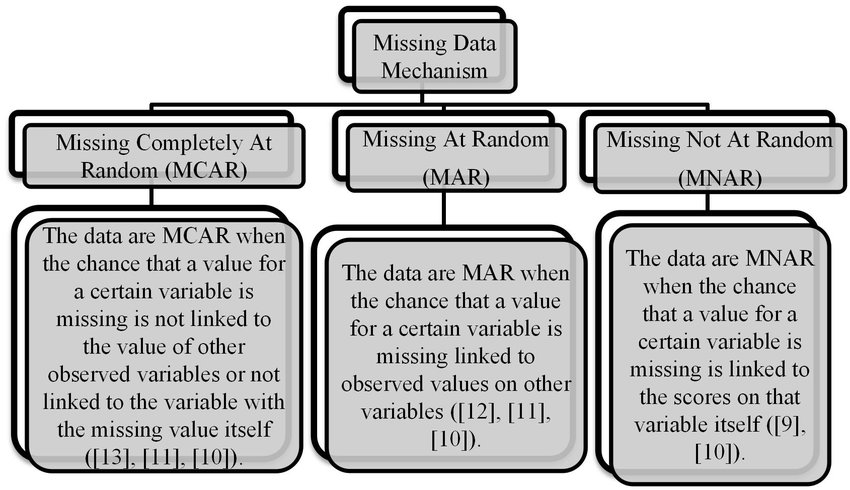

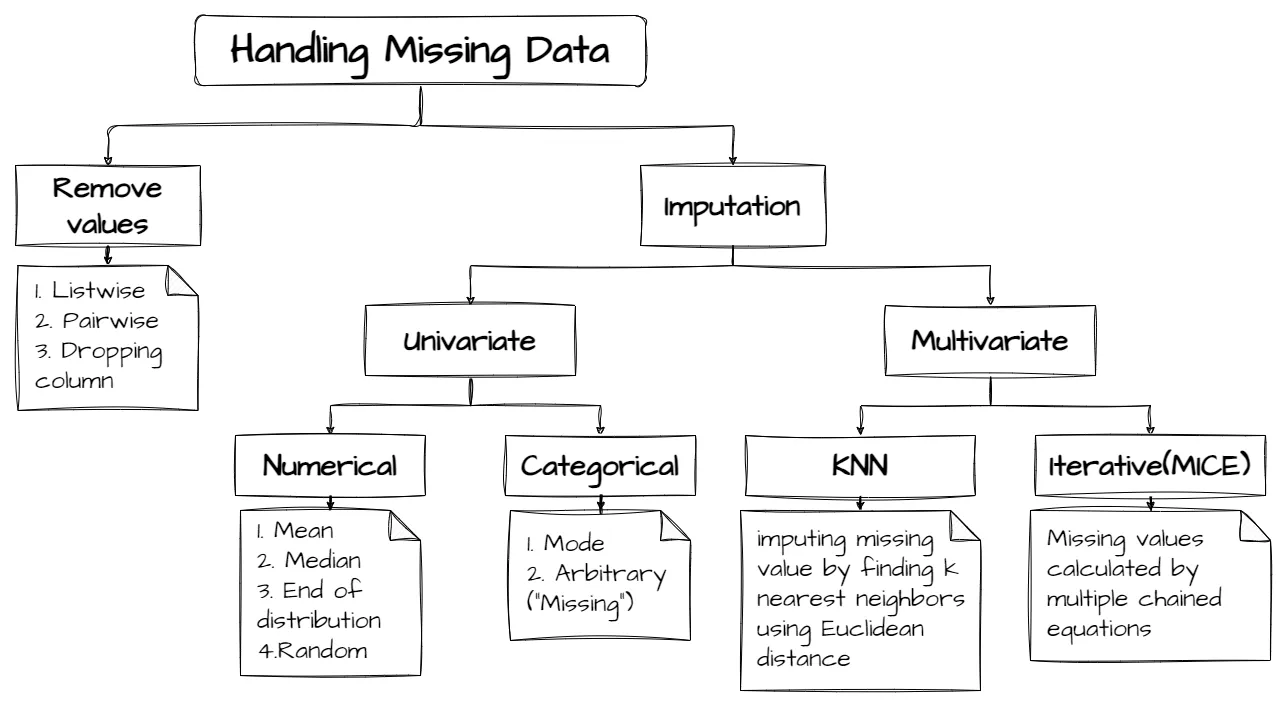

### Remove values

Here are the most useful parameters for `DataFrame.dropna()`:

- **axis**: Determines if rows or columns containing missing values are removed.  
  - `0` or `'index'`: Drop rows with missing values.
  - `1` or `'columns'`: Drop columns with missing values.

- **how**: Specifies the condition for dropping rows or columns based on NA values.
  - `'any'`: Drop if **any** NA values are present in the row or column.
  - `'all'`: Drop only if **all** values are NA in the row or column.

- **thresh**: Specifies the minimum number of **non-NA** values required to keep a row or column.

- **inplace**: If `True`, performs the operation in place and modifies the original DataFrame. If `False`, returns a new DataFrame.

Let's drop the columns with `NaN` only to rip off unuseful columns.

In [37]:
air_quality_data_continuous.dropna(axis=1,how="all",inplace=True)
air_quality_data_continuous

,nox,no2,no,siteid,pm10,temp,location,geo_point_2d,datestart,current,instrumenttype
date_time,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,12.1,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,10.4,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,NaN,NaN,NaN,500,5.797,10.3,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 02:00:00+00:00,NaN,NaN,NaN,500,4.831,10.2,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 03:00:00+00:00,NaN,NaN,NaN,500,6.763,9.7,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 03:00:00+00:00,114.9410,45.3260,45.4020,500,19.324,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 04:00:00+00:00,154.5300,42.4580,73.0920,500,24.155,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 05:00:00+00:00,141.3340,38.4410,67.1050,500,18.358,NaN,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)


Then, let's drop any rows containing a `NaN` value to do the data clean.

In [38]:
air_quality_data_continuous.dropna(how="any")

,nox,no2,no,siteid,pm10,temp,location,geo_point_2d,datestart,current,instrumenttype
date_time,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,12.1,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,10.4,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 04:00:00+00:00,12.5689,7.8616,3.0700,500,8.696,9.6,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 05:00:00+00:00,20.8300,16.4045,2.8862,500,8.696,9.4,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 06:00:00+00:00,44.5488,31.7198,8.3669,500,10.628,9.7,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00+00:00,547.4608,116.7352,280.9119,500,95.654,-0.7,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-12-31 20:00:00+00:00,396.9375,91.1574,199.4246,500,91.789,-0.8,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-12-31 21:00:00+00:00,450.7954,92.4914,233.6798,500,90.823,-1.6,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)


### Imputation

Here’s a summary of the most useful parameters for `DataFrame.fillna()` to help guide the handling of missing values in a DataFrame:

1. **`value`** (scalar, dict, Series, or DataFrame):
   - Specifies the replacement value for missing data.
   - For instance, a single value (e.g., `0`) will replace all missing data.
   - A dictionary or Series can be used to specify fill values for each column or row. 

2. **`method`** (`{'ffill', 'bfill', None}`, default `None`):
   - Defines the method to use for filling missing values:
     - **`ffill`** (or forward fill): fills gaps by propagating the last valid observation forward.
     - **`bfill`** (or backfill): fills gaps by using the next valid observation backward.
   - Only fills consecutive missing values up to the next non-missing value.

3. **`axis`** (DataFrame: `{0 or 'index', 1 or 'columns'}`, Series: `{0 or 'index'}`):
   - Determines if filling should happen across rows (`axis=0`) or columns (`axis=1`) for DataFrames.

4. **`inplace`** (`bool`, default `False`):
   - If `True`, updates the DataFrame in place without creating a new object.
   - If `False`, returns a new DataFrame with the missing values filled.

5. **`limit`** (`int`, default `None`):
   - Sets a maximum number of consecutive missing values to fill.
   - If `method` is specified, only fills up to this number of NaNs in a sequence. 

Replace all `NaN` elements with `0`s.

In [39]:
air_quality_data_continuous.fillna(0)

,nox,no2,no,siteid,pm10,temp,location,geo_point_2d,datestart,current,instrumenttype
date_time,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.4705,7.5840,0.5781,500,6.763,12.1,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.4872,5.0949,0.9080,500,2.899,10.4,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,0.0000,0.0000,0.0000,500,5.797,10.3,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 02:00:00+00:00,0.0000,0.0000,0.0000,500,4.831,10.2,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 03:00:00+00:00,0.0000,0.0000,0.0000,500,6.763,9.7,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 03:00:00+00:00,114.9410,45.3260,45.4020,500,19.324,0.0,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 04:00:00+00:00,154.5300,42.4580,73.0920,500,24.155,0.0,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 05:00:00+00:00,141.3340,38.4410,67.1050,500,18.358,0.0,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)


Replace all `NaN` elements in column 'nox', 'no2', 'no' etc, with their mean respectively.

In [40]:
mean_values = air_quality_data_continuous[['nox', 'no2', 'no', 'siteid', 'pm10', 'temp']].mean().to_dict()
air_quality_data_continuous.fillna(mean_values)

,nox,no2,no,siteid,pm10,temp,location,geo_point_2d,datestart,current,instrumenttype
date_time,,,,,,,,,,,
2020-10-21 23:00:00+00:00,8.470500,7.584000,0.578100,500,6.763,12.10000,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 00:00:00+00:00,6.487200,5.094900,0.908000,500,2.899,10.40000,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 01:00:00+00:00,81.586223,33.107499,31.766229,500,5.797,10.30000,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 02:00:00+00:00,81.586223,33.107499,31.766229,500,4.831,10.20000,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2020-10-22 03:00:00+00:00,81.586223,33.107499,31.766229,500,6.763,9.70000,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 03:00:00+00:00,114.941000,45.326000,45.402000,500,19.324,7.26636,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 04:00:00+00:00,154.530000,42.458000,73.092000,500,24.155,7.26636,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)
2021-01-22 05:00:00+00:00,141.334000,38.441000,67.105000,500,18.358,7.26636,Temple Way,"51.4579497129,-2.58398909033",2017-08-01T00:00:00+00:00,True,Continuous (Reference)


## Statistical Methods

Pandas provides a robust suite of statistical methods that can be applied to DataFrames, enabling users to perform a variety of statistical analyses easily. These methods can be utilized to derive insights from data, such as central tendency, dispersion, and correlations. Below is a list of commonly used statistical methods in Pandas DataFrames:

1. **Central Tendency**
   - **`DataFrame.mean()`**: Computes the mean of each column.
   - **`DataFrame.median()`**: Computes the median of each column.
   - **`DataFrame.mode()`**: Returns the mode(s) of each column.

2. **Dispersion**
   - **`DataFrame.std()`**: Calculates the standard deviation of each column.
   - **`DataFrame.var()`**: Computes the variance of each column.
   - **`DataFrame.min()`**: Returns the minimum value for each column.
   - **`DataFrame.max()`**: Returns the maximum value for each column.
   - **`DataFrame.quantile(q)`**: Computes the q-th quantile of each column (e.g., `q=0.5` for median).

3. **Correlation and Covariance**
   - **`DataFrame.corr()`**: Computes pairwise correlation of columns, excluding NA/null values.
   - **`DataFrame.cov()`**: Computes pairwise covariance of columns.

4. **Count and Frequency**
   - **`DataFrame.count()`**: Returns the number of non-null entries in each column.
   - **`DataFrame.value_counts()`**: Returns a Series containing counts of unique values in a column.


5. **Skewness and Kurtosis**
   - **`DataFrame.skew()`**: Computes the skewness (asymmetry) of the distribution of each column.
   - **`DataFrame.kurt()`**: Computes the kurtosis (tailedness) of the distribution of each column.

## Merge

Pandas provides several powerful methods to combine and compare Series or DataFrame objects. Below are the key methods:

1. **`pd.concat()`**: 
   - Merge multiple Series or DataFrame objects along a shared index or column. Useful for appending data either vertically or horizontally.

2. **`DataFrame.join()`**:
   - Merge multiple DataFrame objects along the columns based on their indices. Simplifies combining DataFrames with different columns.

3. **`pd.merge()`**:
   - Combine two DataFrame objects using SQL-style joins based on one or more keys. Supports inner, outer, left, and right joins.


### Concat

The `concat()` function concatenates an arbitrary amount of `Series` or `DataFrame` objects along an axis while performing optional set logic (union or intersection) of the indexes on the other axes. Like `numpy.concatenate`, `concat()` takes a list or dict of homogeneously-typed objects and concatenates them.

In [41]:
# Creating a DataFrame object named df1 using pandas.
# The DataFrame is constructed with a dictionary where:
# - The keys ("A", "B", "C", "D") represent the column names.
# - The values are lists containing the corresponding data for each column.
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

In [42]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

In [43]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

In [44]:
frames = [df1, df2, df3]
result = pd.concat(frames)

In [45]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### Joining logic of the resulting axis
The `join` keyword specifies how to handle axis values that don’t exist in the first DataFrame.

In [46]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

In [47]:
result = pd.concat([df1, df4], axis=1)

In [48]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


`join='inner'` takes the intersection of the axis values:

In [49]:
result = pd.concat([df1, df4], axis=1, join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


To perform an effective “left” join using the exact index from the original `DataFrame`, result can be reindexed.

In [50]:
## This isn't equivalent to reset_index()
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


For `DataFrame` objects which don’t have a meaningful index, the `ignore_index` ignores overlapping indexes.

In [51]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


#### Resulting keys
The `keys` argument adds another axis level to the resulting index or column (creating a `MultiIndex`) associate specific keys with each original `DataFrame`.

In [52]:
result = pd.concat(frames, keys=["x", "y", "z"])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

The `keys` argument cane override the column names when creating a new `DataFrame` based on existing `Series`.

In [53]:
s1 = pd.Series([0, 1, 2, 3], name="foo")
s2 = pd.Series([0, 1, 2, 3])
s3 = pd.Series([0, 1, 4, 5])
pd.concat([s1, s2, s3], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [54]:
pd.concat([s1, s2, s3], axis=1, keys=["red", "blue", "yellow"])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


You can also pass a `dict` to `concat()` in which case the dict keys will be used for the `keys` argument unless other `keys` argument is specified:

In [55]:
pieces = {"x": df1, "y": df2, "z": df3}
result = pd.concat(pieces)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [56]:
result = pd.concat(pieces, keys=["z", "y"])
result

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

#### Appending rows to a DataFrame
If you have a `Series` that you want to append as a single row to a `DataFrame`, you can convert the row into a `DataFrame` and use `concat()`:

In [57]:
s4 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
result = pd.concat([df1, s4.to_frame().T], ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


### Merge
`merge()` performs join operations similar to relational databases like SQL. Users who are familiar with SQL but new to pandas can reference a comparison with SQL.

#### Merge types
`merge()` implements common SQL style joining operations.

- **one-to-one**: joining two DataFrame objects on their indexes which must contain unique values.

- **many-to-one**: joining a unique index to one or more columns in a different DataFrame.

- **many-to-many**: joining columns on columns.

For a many-to-many join, if a key combination appears more than once in both tables, the `DataFrame` will have the **Cartesian product** of the associated data.

In [58]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [59]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [60]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


The `how` argument to `merge()` specifies which keys are included in the resulting table. If a key combination **does not appear** in either the left or right tables, the values in the joined table will be NA. Here is a summary of the `how` options and their SQL equivalent names:

| Merge Method | SQL Join Name       | Description                                |
|--------------|---------------------|--------------------------------------------|
| left         | LEFT OUTER JOIN     | Use keys from left frame only              |
| right        | RIGHT OUTER JOIN    | Use keys from right frame only             |
| outer        | FULL OUTER JOIN     | Use union of keys from both frames         |
| inner        | INNER JOIN          | Use intersection of keys from both frames  |
| cross        | CROSS JOIN          | Create the cartesian product of rows of both frames |


In [61]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [62]:
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [63]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [64]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [65]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [66]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [67]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### DataFrame.join()

`DataFrame.join()` combines the columns of multiple, potentially differently-indexed `DataFrame` into a single result `DataFrame`

In [68]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [69]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [70]:
result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [71]:
result = left.join(right, how="outer")
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [72]:
result = left.join(right, how="inner")
result

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


`DataFrame.join()` takes an optional on argument which may be a column or multiple column names that the passed `DataFrame` is to be aligned.

In [73]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [74]:
right = pd.DataFrame({"C": ["C0", "C1"], "D": ["D0", "D1"]}, index=["K0", "K1"])
right

,C,D
K0,C0,D0
K1,C1,D1


In [75]:
result = left.join(right, on="key")
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [76]:
## This is equivalent as above
result = pd.merge(
    left, right, left_on="key", right_index=True, how="left", sort=False
)
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


To join on multiple keys, the passed `DataFrame` must have a `MultiIndex`:

In [77]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
    }
)

index = pd.MultiIndex.from_tuples(
    [("K0", "K0"), ("K1", "K0"), ("K2", "K0"), ("K2", "K1")]
)

right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=index
)

In [78]:
result = left.join(right, on=["key1", "key2"])

result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


#### Joining a single Index to a MultiIndex
You can join a `DataFrame` with a `Index` to a DataFrame with a `MultiIndex` on a level. The name of the `Index` with match the level name of the `MultiIndex`.

In [79]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]},
    index=pd.Index(["K0", "K1", "K2"], name="key"),
)
left

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [80]:
index = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")],
    names=["key", "Y"],
)

In [81]:
right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]},
    index=index,
)
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [82]:
result = left.join(right, how="inner")
result

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

#### Merging on a combination of columns and index levels

Strings passed as the `on`, `left_on`, and `right_on` parameters may refer to either column names or index level names. This enables merging `DataFrame` instances on a combination of index levels and columns without resetting indexes.

In [83]:
left_index = pd.Index(["K0", "K0", "K1", "K2"], name="key1")

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key2": ["K0", "K1", "K0", "K1"],
    },
    index=left_index,
)
left

,A,B,key2
key1,,,
K0,A0,B0,K0
K0,A1,B1,K1
K1,A2,B2,K0
K2,A3,B3,K1


In [84]:
right_index = pd.Index(["K0", "K1", "K2", "K2"], name="key1")

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
        "key2": ["K0", "K0", "K0", "K1"],
    },
    index=right_index,
)
right

,C,D,key2
key1,,,
K0,C0,D0,K0
K1,C1,D1,K0
K2,C2,D2,K0
K2,C3,D3,K1


In [85]:
result = left.merge(right, on=["key1", "key2"])
result

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


#### Joining multiple DataFrame
A list or tuple of `:class:DataFrame` can also be passed to `join()` to join them together on their indexes.

In [86]:
right2 = pd.DataFrame({"v": [7, 8, 9]}, index=["K1", "K1", "K2"])

result = left.join([right, right2])
result

,A,B,key2_x,C,D,key2_y,v
K0,A0,B0,K0,C0,D0,K0,NaN
K0,A1,B1,K1,C0,D0,K0,NaN
K1,A2,B2,K0,C1,D1,K0,7.0
K1,A2,B2,K0,C1,D1,K0,8.0
K2,A3,B3,K1,C2,D2,K0,9.0
K2,A3,B3,K1,C3,D3,K1,9.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria.

- **Applying** a function to each group independently.

- **Combining** the results into a data structure.

In [87]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.346453,-0.516176
1,bar,one,1.221416,-0.845091
2,foo,two,-0.206926,-0.244284
3,bar,three,-0.902263,0.317801
4,foo,two,0.500032,1.056708
5,bar,two,-0.673211,-0.868801
6,foo,one,-0.044871,-0.048682
7,foo,three,0.732990,0.181006


Grouping by a column label, selecting column labels, and then applying the `DataFrameGroupBy.sum()` function to the resulting groups:

In [88]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.354057,-1.396091
foo,1.327678,0.428573


Grouping by multiple columns label forms `MultiIndex`.

In [89]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.221416 -0.845091
    three -0.902263  0.317801
    two   -0.673211 -0.868801
foo one    0.301582 -0.564857
    three  0.732990  0.181006
    two    0.293106  0.812424

## Exercise 3

From the UKPVGeo database, we want to find a rough value for the number of solar panels/farms in the Bristol area which are listed as operational.

*You can complete this task following the steps below, or approach this in a different way if you prefer. However, you should aim to use SQL queries as part of your solution.*

Data dictionary: [data/README_ukpvgeo.txt](data/README_ukpvgeo.txt)

1) Consider which columns for this database would provide information about the status of the PV panel and whether this is operational. Based on the SQL query defined above (`query`), create and run a new SQL query which also extracts additional column(s) from the database.

In [90]:
## Add your code here

2) When querying the database, what would be a useful filter to include to only select a rough area around Bristol (e.g. ~20km)? Based on the SQL query defined in the previous question, create and run an SQL query which only grabs the data for an area around Bristol.

*Hint: central Bristol is at roughly 51.455795, -2.583467 degrees (0.1 degrees is ~11km)*

In [91]:
## Add your code here

3) For the DataFrame you have created, use pandas to filter this to only include entries where the site is listed as operational

In [92]:
## Add your code here

4) For this filtered DataFrame, find the number of solar panels/farm in total.

In [93]:
## Add your code here